In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv', index_col = 'FullDate', parse_dates= True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [2]:
#check shape of data and missing values
print(df.shape)
print(df.isna().sum())

(92016, 4)
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64


In [3]:
df.describe(include='all')

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [4]:
from pandas.io.formats.style_render import DataFrame
#resampling daily method
df_1 = df.copy()
df_2 = df_1.resample('D').sum()  #Note that df_2 is our daily dataframe
print(df_2.shape)
df_2.head()

(3834, 4)


,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [5]:
roll_mean = df_2.rolling(window = 30).mean()
roll_std = df_2.rolling(window = 30).std()

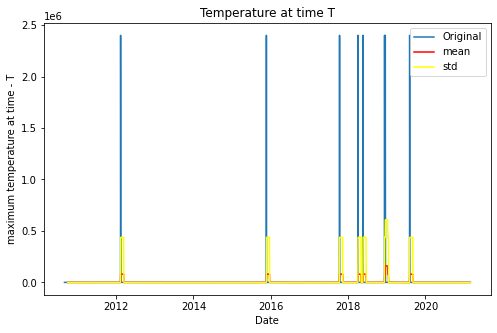

In [6]:
plt.figure(figsize = (8,5))
plt.plot(df_2.index, df_2.Tmax, label = 'Original')
plt.plot(roll_mean.Tmax, color = 'red', label = 'mean')
plt.plot(roll_std.Tmax, color = 'yellow', label = 'std')
plt.legend()
plt.xlabel("Date")
plt.ylabel("maximum temperature at time - T")
plt.title('Temperature at time T')
plt.show()

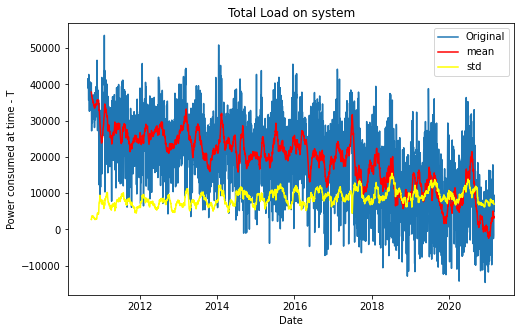

In [7]:
plt.figure(figsize = (8,5))
plt.plot(df_2.index, df_2.SysLoad, label = 'Original')
plt.plot(roll_mean.SysLoad, color = 'red', label = 'mean')
plt.plot(roll_std.SysLoad, color = 'yellow', label = 'std')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Power consumed at time - T")
plt.title('Total Load on system')
plt.show()

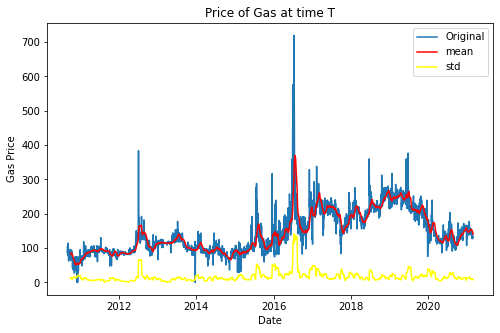

In [8]:
plt.figure(figsize = (8,5))
plt.plot(df_2.index, df_2.GasPrice, label = 'Original')
plt.plot(roll_mean.GasPrice, color = 'red', label = 'mean')
plt.plot(roll_std.GasPrice, color = 'yellow', label = 'std')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Gas Price")
plt.title('Price of Gas at time T')
plt.show()

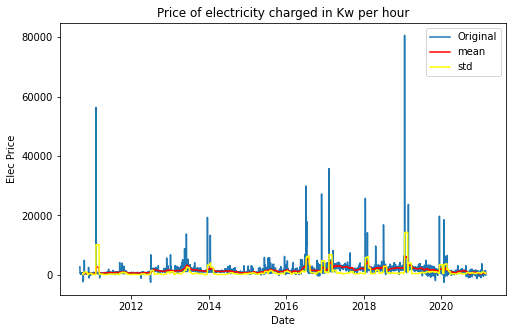

In [9]:
plt.figure(figsize = (8,5))
plt.plot(df_2.index, df_2.ElecPrice, label = 'Original')
plt.plot(roll_mean.ElecPrice, color = 'red', label = 'mean')
plt.plot(roll_std.ElecPrice, color = 'yellow', label = 'std')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Elec Price")
plt.title('Price of electricity charged in Kw per hour')
plt.show()

# **Stationary Test**


ADF test






In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def stationary_test(d_set):
  df_test = adfuller(d_set, autolag='AIC')
  adf = pd.Series(df_test[0:4], index = ['Test Statistics', 'p-value', '# Lags', '# observations'])

  for key, value in df_test[4].items():
    adf['Critical Value (%s)' %key] = value
  print(adf)

  p = adf['p-value']
  if p <= 0.05:
    print("\n Series is Stationary")
  else:
    print("\n Series is Non Stationary")


In [12]:
stationary_test(df_2.Tmax)

Test Statistics          -20.766001
p-value                    0.000000
# Lags                     6.000000
# observations          3827.000000
Critical Value (1%)       -3.432060
Critical Value (5%)       -2.862296
Critical Value (10%)      -2.567172
dtype: float64

 Series is Stationary


In [13]:
stationary_test(df_2.SysLoad)

Test Statistics           -3.690159
p-value                    0.004254
# Lags                    30.000000
# observations          3803.000000
Critical Value (1%)       -3.432071
Critical Value (5%)       -2.862300
Critical Value (10%)      -2.567175
dtype: float64

 Series is Stationary


In [14]:
stationary_test(df_2.GasPrice)

Test Statistics           -2.902767
p-value                    0.045027
# Lags                    27.000000
# observations          3806.000000
Critical Value (1%)       -3.432069
Critical Value (5%)       -2.862300
Critical Value (10%)      -2.567174
dtype: float64

 Series is Stationary


In [15]:
stationary_test(df_2.ElecPrice)

Test Statistics        -8.269054e+00
p-value                 4.848818e-13
# Lags                  2.000000e+01
# observations          3.813000e+03
Critical Value (1%)    -3.432066e+00
Critical Value (5%)    -2.862298e+00
Critical Value (10%)   -2.567174e+00
dtype: float64

 Series is Stationary


# **Further Instructions (14 - 16)**

> Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16 





In [16]:
df_2.reset_index(inplace = True)
data = df_2[["FullDate", "ElecPrice"]]
print(data.shape)
data.head()

(3834, 2)


,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [17]:
data = data.rename(columns = {"FullDate" : "ds", "ElecPrice" : "y"})
data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


# Spliting the data

In [18]:
train = data[:2757]
test = data[2757:]
print(train.shape)
print(test.shape)

(2757, 2)
(1077, 2)


In [19]:
model = Prophet(daily_seasonality = True)
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp92iyg5xw/3bat4gx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp92iyg5xw/3m87ejf_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4399', 'data', 'file=/tmp/tmp92iyg5xw/3bat4gx7.json', 'init=/tmp/tmp92iyg5xw/3m87ejf_.json', 'output', 'file=/tmp/tmp92iyg5xw/prophet_model5faf3cg0/prophet_model-20221012095936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
predictions = model.predict(test)


In [21]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,4210.287161,-1.193803,5105.663776,4210.287161,4210.287161,-1674.972252,-1674.972252,-1674.972252,-1519.218463,...,9.746355,9.746355,9.746355,-165.500145,-165.500145,-165.500145,0.0,0.0,0.0,2535.314909
1,2018-03-21,4211.100590,99.506610,4973.966846,4211.100590,4211.100590,-1522.383711,-1522.383711,-1522.383711,-1519.218463,...,159.375608,159.375608,159.375608,-162.540856,-162.540856,-162.540856,0.0,0.0,0.0,2688.716879
2,2018-03-22,4211.914019,574.361051,5288.352422,4211.914019,4211.914019,-1424.095695,-1424.095695,-1424.095695,-1519.218463,...,257.140553,257.140553,257.140553,-162.017786,-162.017786,-162.017786,0.0,0.0,0.0,2787.818324
3,2018-03-23,4212.727448,115.038721,5076.930731,4212.727448,4212.727448,-1632.705017,-1632.705017,-1632.705017,-1519.218463,...,50.279187,50.279187,50.279187,-163.765742,-163.765742,-163.765742,0.0,0.0,0.0,2580.022431
4,2018-03-24,4213.540878,-164.926220,4657.489219,4213.540878,4213.540878,-1958.239415,-1958.239415,-1958.239415,-1519.218463,...,-271.477866,-271.477866,-271.477866,-167.543086,-167.543086,-167.543086,0.0,0.0,0.0,2255.301463


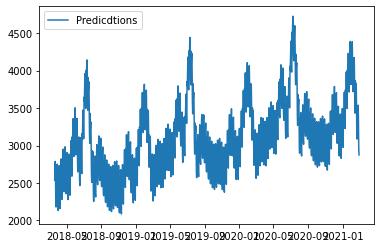

In [22]:
plt.plot(predictions.ds, predictions.yhat, label = "Predicdtions")
plt.legend()
plt.show()

# Mean Absolute Percentage Error (MAPE)

In [23]:
y = np.array(test.y)
yp = np.array(predictions.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 548.82


# ROOT MEAN SQUARE

In [24]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test['y']), np.array(predictions['yhat'])))
print(f'The Root Mean Squared Error (RMSE) value is : %s' %(round(rmse,2)))

The Root Mean Squared Error (RMSE) value is : 3216.9


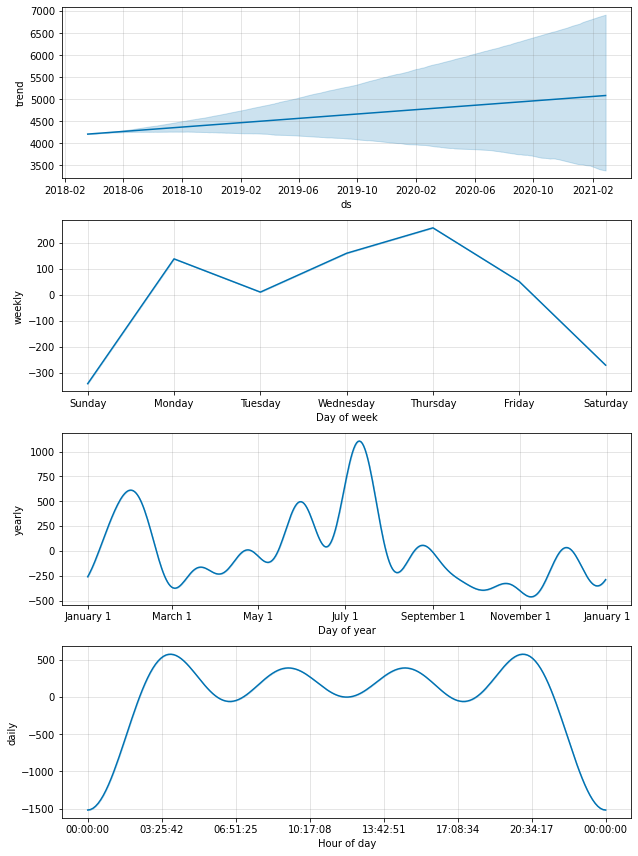

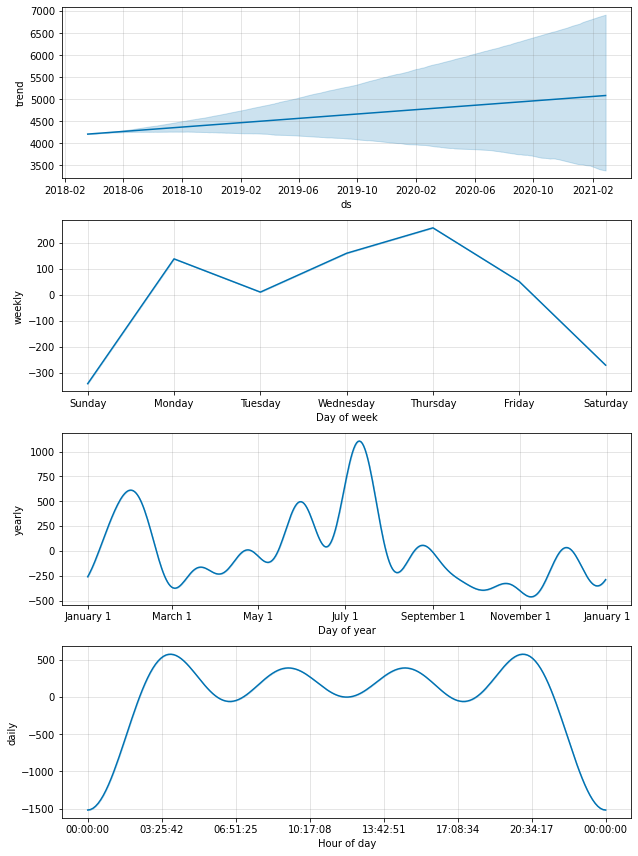

In [25]:
model.plot_components(predictions)

# Further Instructions (17-19)

#Multivariate Time Series Forecasting with Facebook Prophet

> In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:



In [26]:
df_2.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [27]:
df_2.reset_index(inplace = True)
df_3 = df_2
print(df_3.shape)
df_3.head()

(3834, 6)


,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [28]:
df_3 = df_3.rename(columns = {'FullDate': 'ds',
                                        'ElecPrice':'y',
                                        'SysLoad': 'add1',
                                        'Tmax': 'add2',
                                        'GasPrice': 'add3'})

In [29]:
train = df_3[:2757]
test = df_3[2757:]
print(train.shape)
print(test.shape)

(2757, 6)
(1077, 6)


In [30]:
multi_model = Prophet(daily_seasonality = True)
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')
multi_model.fit(train)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp92iyg5xw/iry60hkr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp92iyg5xw/wj6r9rm4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11144', 'data', 'file=/tmp/tmp92iyg5xw/iry60hkr.json', 'init=/tmp/tmp92iyg5xw/wj6r9rm4.json', 'output', 'file=/tmp/tmp92iyg5xw/prophet_model16gw06cq/prophet_model-20221012095942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# MEAN ABSOLUTE PERCENTAGE ERROR

In [31]:
y_pred = multi_model.predict(test)
y = np.array(test.y)
yp = np.array(y_pred.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 234.31


# ROOT MEAN SQUARE ERROR

In [32]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y,yp))
print('The Root Mean Squarfe (RMSE) value is : {}'.format(round(rmse,2)))

The Root Mean Squarfe (RMSE) value is : 2710.29


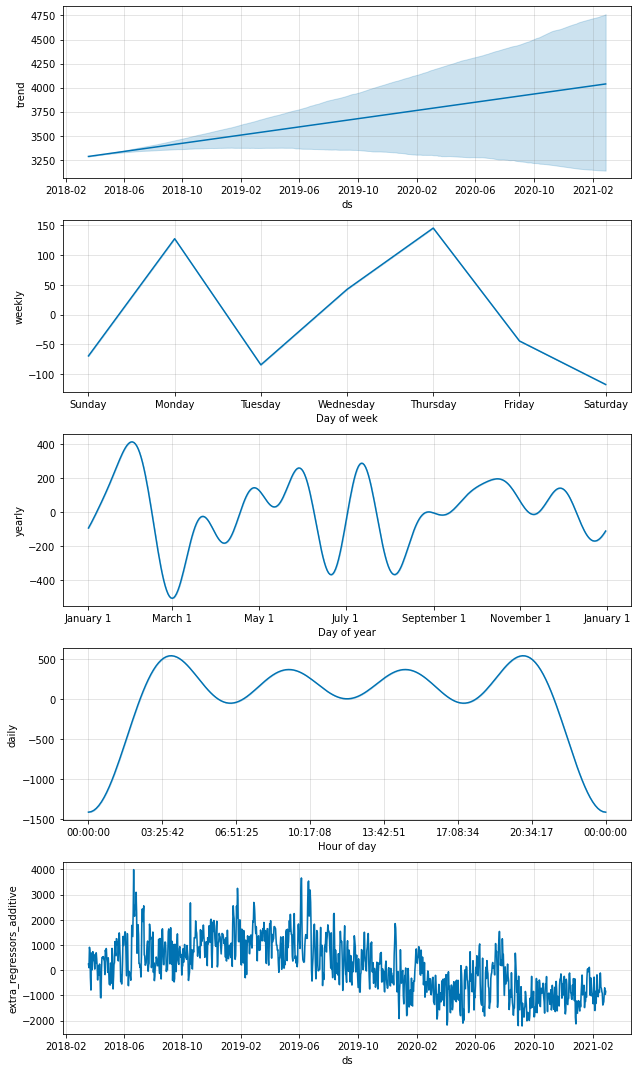

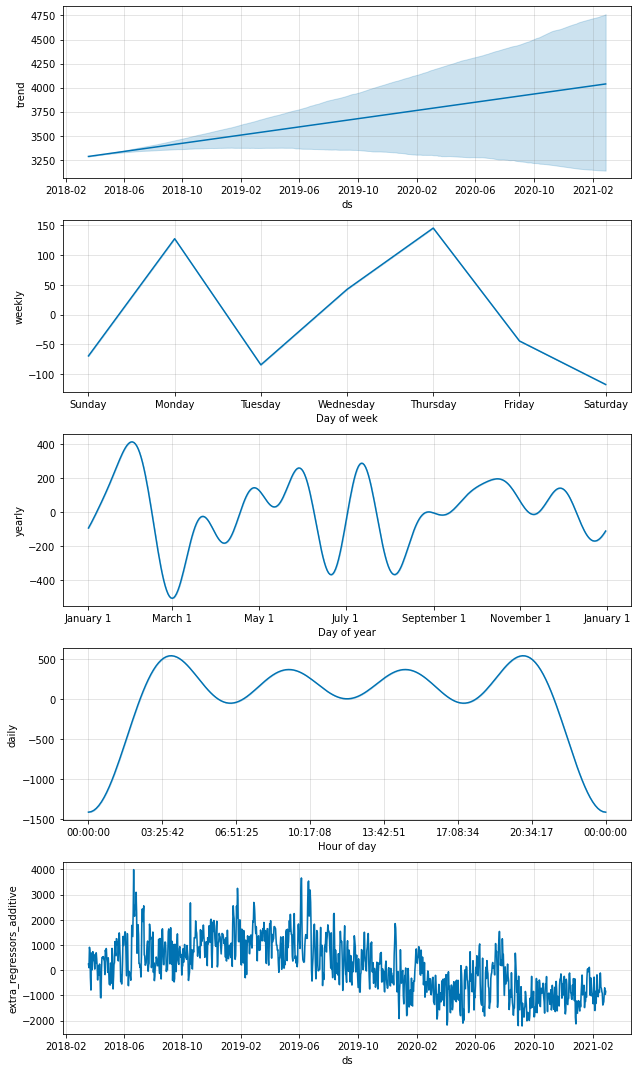

In [33]:
multi_model.plot_components(y_pred)

# DROPPING TMAX

In [34]:
df_2.head()

,index,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,0,2010-09-01,379.2,41565.380,88.56,2751.700
1,1,2010-09-02,369.6,38898.990,88.56,570.810
2,2,2010-09-03,439.2,41665.760,106.80,504.975
3,3,2010-09-04,328.8,35638.085,81.36,502.275
4,4,2010-09-05,357.6,35611.410,106.80,500.555


In [35]:
df_4 = df_2.drop('Tmax', axis = 1)
df_4.shape

(3834, 5)

In [36]:
df_4 = df_4.rename(columns = {"FullDate": 'ds',"ElecPrice": "y", "SysLoad": "add1", "GasPrice": "add2"})

In [37]:
df_4.head()

,index,ds,add1,add2,y
0,0,2010-09-01,41565.380,88.56,2751.700
1,1,2010-09-02,38898.990,88.56,570.810
2,2,2010-09-03,41665.760,106.80,504.975
3,3,2010-09-04,35638.085,81.36,502.275
4,4,2010-09-05,35611.410,106.80,500.555


In [38]:
train = df_4[:2757]
test = df_4[2757:]
print(train.shape)
print(test.shape)

(2757, 5)
(1077, 5)


In [39]:
train.head()

,index,ds,add1,add2,y
0,0,2010-09-01,41565.380,88.56,2751.700
1,1,2010-09-02,38898.990,88.56,570.810
2,2,2010-09-03,41665.760,106.80,504.975
3,3,2010-09-04,35638.085,81.36,502.275
4,4,2010-09-05,35611.410,106.80,500.555


In [40]:
multi_model = Prophet(daily_seasonality = True)
multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp92iyg5xw/uc37qg7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp92iyg5xw/5em5w5v7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63743', 'data', 'file=/tmp/tmp92iyg5xw/uc37qg7e.json', 'init=/tmp/tmp92iyg5xw/5em5w5v7.json', 'output', 'file=/tmp/tmp92iyg5xw/prophet_model4uxun14e/prophet_model-20221012095951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# MEAN ABSOLUTE PERCENTAGE ERROR

In [41]:
y_pred = multi_model.predict(test)
y = np.array(test.y)
yp= np.array(y_pred.yhat)
MAPE = np.mean(((np.abs((y-yp)/y)))*100)
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE, 2)}')

The Mean Average Percentage Error (MAPE) is: 233.02
